<a href="https://colab.research.google.com/github/lindseyvanosky/Logistic-Random-Forest-or-KNN/blob/main/LV_Logistic%2C_Random_Forest%2C_or_KNN%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic, Random Forest, or KNN?
- Lindsey Vanosky 
- 07.07.22

##Import, Upload & Inspect

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier


filename = "/content/drive/MyDrive/Coding Dojo/02 Stack 2: Intro to Machine Learning/Data Sets/wisconsinBreastCancer - wisconsinBreastCancer.csv"
df = pd.read_csv(filename)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Logistic Regression Model 

Converting Target to Numeric Value

In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

Creating Pipeline

In [ ]:
x = df.drop(columns = "diagnosis")
y = df["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
scaler = StandardScaler()
logreg = LogisticRegression() 
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
test_score = logreg_pipe.score(x_test, y_test)
train_score = logreg_pipe.score(x_train, y_train)
print(test_score)
print(train_score)

0.9790209790209791
0.9882629107981221


###L1 Tuning

We will loop for optimal c values and change the solver to liblinear

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg1 = LogisticRegression(C = c, max_iter = 1000, solver = "liblinear", penalty = "l1")
  log_reg_pipe1 = make_pipeline(scaler, log_reg1)
  log_reg_pipe1.fit(x_train, y_train)

  train_scores.append(log_reg_pipe1.score(x_train, y_train))
  test_scores.append(log_reg_pipe1.score(x_test, y_test))


Visualizing Change in Accuracy

{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.951048951048951,
 0.1: 0.972027972027972,
 10: 0.9440559440559441,
 100: 0.9370629370629371,
 1000: 0.9370629370629371}

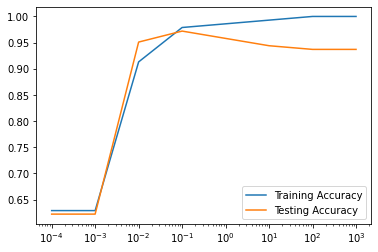

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = "Training Accuracy")
ax.plot(c_values, test_scores, label = "Testing Accuracy")
ax.set_xticks(c_values)
ax.legend()
ax.set_xscale("log")
{c:score for c, score in zip(c_values, test_scores)}

Our optimal c value is 0.1

In [ ]:
log_reg_final_L1 = LogisticRegression(C = 0.1, solver = "liblinear", penalty = "l1")
log_reg_final_L1.fit(x_train, y_train)
train_score_final_L1 = log_reg_final_L1.score(x_train, y_train)
test_score_final_L1 = log_reg_final_L1.score(x_test, y_test)

print(train_score_final_L1)
print(test_score_final_L1)

0.931924882629108
0.965034965034965


###L2 Tuning

We will loop for optimal c values and change solver to liblinear

{0.0001: 0.951048951048951,
 0.001: 0.951048951048951,
 0.01: 0.9790209790209791,
 1: 0.9790209790209791,
 10: 0.972027972027972,
 100: 0.951048951048951,
 1000: 0.9230769230769231}

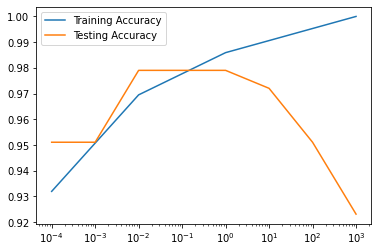

In [ ]:
c_values2 = [0.0001, 0.001, 0.01, 1, 10, 100, 1000]
train_scores2 = []
test_scores2 = []

for c in c_values2:
  log_reg2 = LogisticRegression(C=c, solver = "liblinear", penalty = "l2")
  log_reg_pipe2 = make_pipeline(scaler, log_reg2)
  log_reg_pipe2.fit(x_train, y_train)

  train_scores2.append(log_reg_pipe2.score(x_train, y_train))
  test_scores2.append(log_reg_pipe2.score(x_test, y_test))

fig, ax = plt.subplots(1,1)
ax.plot(c_values2, train_scores2, label = "Training Accuracy")
ax.plot(c_values2, test_scores2, label = "Testing Accuracy")
ax.set_xticks(c_values2)
ax.legend()

ax.set_xscale("log")
{c:score for c, score in zip(c_values2, test_scores2)}

###Recall Score

In [ ]:
test_pred = log_reg_pipe2.predict(x_test)

logreg_recall = recall_score(y_test, test_pred)

print(logreg_recall)

0.9814814814814815


##KNN Model 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
predictions = knn_pipe.predict(x_test)

acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.951048951048951


####Finding Optimal Neighbor Values

TLDR: I struggled with getting the loop to work, so I manually tested different values and found n_neighbors = 9 to be most optimal.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.958041958041958


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.958041958041958


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.965034965034965


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.958041958041958


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.965034965034965


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.958041958041958


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.965034965034965


In [ ]:
#winner
knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.972027972027972


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
acc_score = knn_pipe.score(x_test, y_test)
print(acc_score)

0.965034965034965


I was able to achieve a much higher score with the KNN model.

###Recall Score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(x_train, y_train)
knn_test_pred = knn_pipe.predict(x_test)

knn_recall_score = recall_score(y_test, test_pred)

print(knn_recall_score)

0.9814814814814815


##Random Forest

In [ ]:
rf = RandomForestClassifier()
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
test_score_rf = rf_pipe.score(x_test, y_test)
train_score_rf = rf_pipe.score(x_train, y_train)

print(test_score_rf)
print(train_score_rf)

0.965034965034965
1.0


In [ ]:
rf_pipe.get_params()

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__random_state': None,
 'randomforestclassifier__verbose': 0,
 'randomforestclassifier__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__wi

In [ ]:
rf = RandomForestClassifier(min_samples_split = 2)
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(x_train, y_train)
test_score_rf = rf_pipe.score(x_test, y_test)
train_score_rf = rf_pipe.score(x_train, y_train)

print(test_score_rf)
print(train_score_rf)

0.972027972027972
1.0


###Recall Score

In [ ]:
rf_test_pred = rf_pipe.predict(x_test)

rf_recall_score = recall_score(y_test, test_pred)

print(rf_recall_score)

0.9814814814814815


##Conclusion

###1) Hyperparameters

***Logistic Regression Model*** 
- For this model I tuned the L1 and L2 hyperparameters for c values, and solver type. 
<br></br>

***KNN Model***
*  For the KNN model, I tuned the n_neighbors hyperparameter
<br></br>

***Random Forest***
- For the Random Forest model, I tuned the min_sample_split hyperparameter

###Production

Considering each model returned an equal recall score, the most successful model was the Logistic Regression with L2 tuning. We were able to achieve a score of 97.9 on testing data. 

###Considerations

Considering that type II errors are detrimental in this case (missing a positive cancer diagnosis) so for that I chose metrics that punish type II errors such as the L2 tuning and using the recall score. Given that I was able to achieve results with both of these metrics on the Logistic Regression Model, it is in my opinion "best."